# Exercise 1
Try to build a classifier for the MNIST dataset that achieves over 97% accuracy on the test set.
Hint: the Kneighborsclassifier works quite well for this task you just need to find good hyperparameter values( try a grid search on the weights and N-neighbors hyperparameters)

## Download the Dataset

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

/usr/local/lib/python3.10/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [28]:
y = y.astype(np.uint8)

In [3]:
y.shape

(70000,)

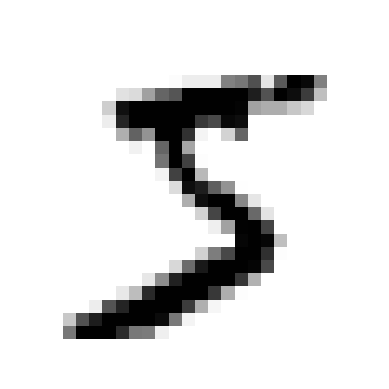

In [5]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")

plt.show() #display sample data (28,28 grid colored as image)

In [6]:
type(some_digit)

numpy.ndarray

In [31]:
import numpy as np
def display_image(image_grid: np.ndarray, y:str):
    image_grid = image_grid.reshape(28,28)
    fig, ax = plt.subplots()
    
    ax.imshow(image_grid, mpl.cm.binary)
    # plt.axis('off')
    ax.set_title(str(y))
    plt.show()

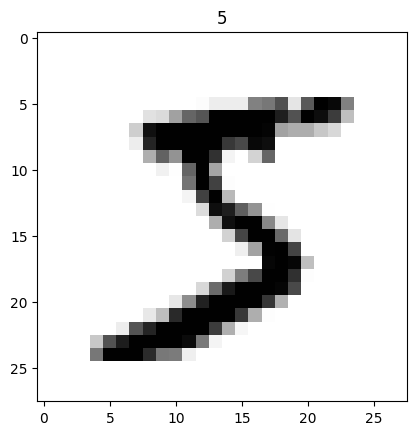

In [23]:
display_image(X[0],y[0])

## Training Sets

In [30]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

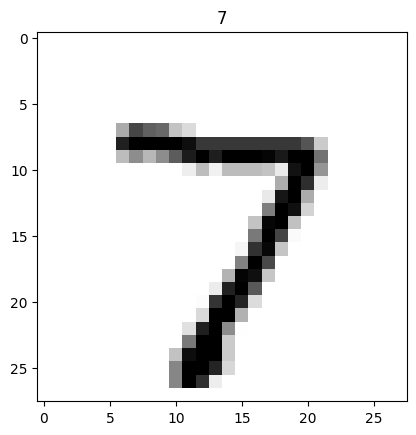

In [32]:
display_image(X_test[0], y_test[0])

In [53]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [33]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [70]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [71]:
knn_clf = KNeighborsClassifier(n_jobs=12)

In [72]:
param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [3, 4, 5, 7]}]

In [73]:
gridsearch = GridSearchCV(knn_clf,param_grid, cv=5, verbose=3)

In [74]:
gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END ....n_neighbors=3, weights=uniform;, score=0.972 total time=   1.9s
[CV 2/5] END ....n_neighbors=3, weights=uniform;, score=0.971 total time=   1.9s
[CV 3/5] END ....n_neighbors=3, weights=uniform;, score=0.969 total time=   1.9s
[CV 4/5] END ....n_neighbors=3, weights=uniform;, score=0.969 total time=   1.9s
[CV 5/5] END ....n_neighbors=3, weights=uniform;, score=0.970 total time=   1.9s
[CV 1/5] END ...n_neighbors=3, weights=distance;, score=0.972 total time=   1.8s
[CV 2/5] END ...n_neighbors=3, weights=distance;, score=0.972 total time=   1.9s
[CV 3/5] END ...n_neighbors=3, weights=distance;, score=0.970 total time=   1.9s
[CV 4/5] END ...n_neighbors=3, weights=distance;, score=0.970 total time=   1.9s
[CV 5/5] END ...n_neighbors=3, weights=distance;, score=0.971 total time=   1.9s
[CV 1/5] END ....n_neighbors=4, weights=uniform;, score=0.969 total time=   1.9s
[CV 2/5] END ....n_neighbors=4, weights=uniform;,

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_jobs=12),
             param_grid=[{'n_neighbors': [3, 4, 5, 7],
                          'weights': ['uniform', 'distance']}],
             verbose=3)

In [75]:
gridsearch.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

In [76]:
gridsearch.best_estimator_

KNeighborsClassifier(n_jobs=12, n_neighbors=4, weights='distance')

In [77]:
gridsearch.best_score_

0.9716166666666666

In [78]:
gridsearch.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [79]:
gridsearch.predict([X[0]])

array([5], dtype=uint8)

In [80]:
from sklearn.metrics import accuracy_score

y_pred = gridsearch.predict(X_test)
accuracy_score(y_test, y_pred)

0.9714

# Exercise 2
Write a function that can shift a MNIST image in any direction, (left, right, up, down) by one pixel.^1
Then for each image in the training set, create four shifted copies one per direction then add them to the training set.
Finally train your best model on this expanded training set and measure its accuracy on the test set. We should now see an improvement

- You can use the shift() function from the scipy.ndimage.interpolation module for example shift(image, [2, 1], cval=0) shifts the image two pixels down and one pixel to the right

In [68]:
from scipy.ndimage import shift

In [82]:
def shift_image(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape([-1])

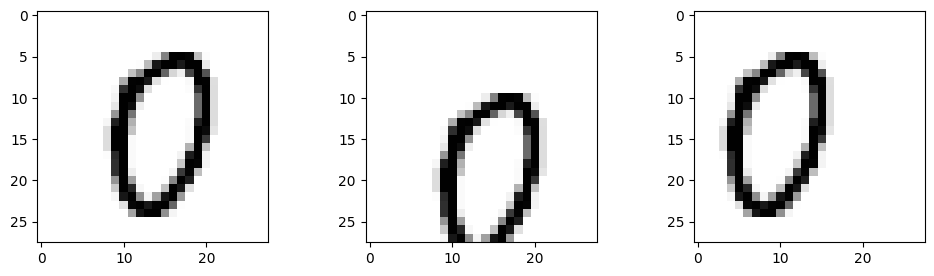

In [89]:
image = X_train[1000]
shifted_image_down = shift_image(image, 0, 5)
shifted_image_left = shift_image(image, -5, 0)
plt.figure(figsize=(12,3))
plt.subplot(131)
# plt.title("Original")
plt.imshow(image.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(132)
# plt.title("Shifted down", fontsize=14)
plt.imshow(shifted_image_down.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(133)
# plt.title("Shifted left", fontsize=14)
plt.imshow(shifted_image_left.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.show()

In [90]:
X_train_augment = [image for image in X_train] #convert image to list of images
y_train_augment = [label for label in y_train]

for dx, dy in ((1,0), (-1, 0), (0, 1), (0,-1)):
    for image, label in zip(X_train, y_train):
        X_train_augment.append(shift_image(image, dx, dy))
        y_train_augment.append(label)

X_train_augment = np.array(X_train_augment)
y_train_augment = np.array(y_train_augment)

In [93]:
shuffle_idx = np.random.permutation(len(X_train_augment))
X_train_augmented = X_train_augment[shuffle_idx]
y_train_augmented = y_train_augment[shuffle_idx]

In [95]:
knn_clf = KNeighborsClassifier(**gridsearch.best_params_, n_jobs=12)

In [96]:
knn_clf.fit(X_train_augmented, y_train_augmented)

KNeighborsClassifier(n_jobs=12, n_neighbors=4, weights='distance')

In [97]:
y_pred = knn_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9763

# Exercise 3
Tack the titanic dataset a great place to start is on kaggle

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

In [98]:
import numpy as np
import pandas as pd
import os

In [115]:
titanic_train = pd.read_csv('chpt3/train.csv')
titanic_test = pd.read_csv('chpt3/test.csv')
titanic_survived = pd.read_csv('chpt3/gender_submission.csv')

In [109]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [110]:
'''
Age - mean / median
ticket (object) likely not usable
Cabin

'''

titanic_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [114]:
titanic_train['Cabin'].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
F2             3
C22 C26        3
              ..
C106           1
A19            1
D7             1
C118           1
E50            1
Name: count, Length: 147, dtype: int64

In [112]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


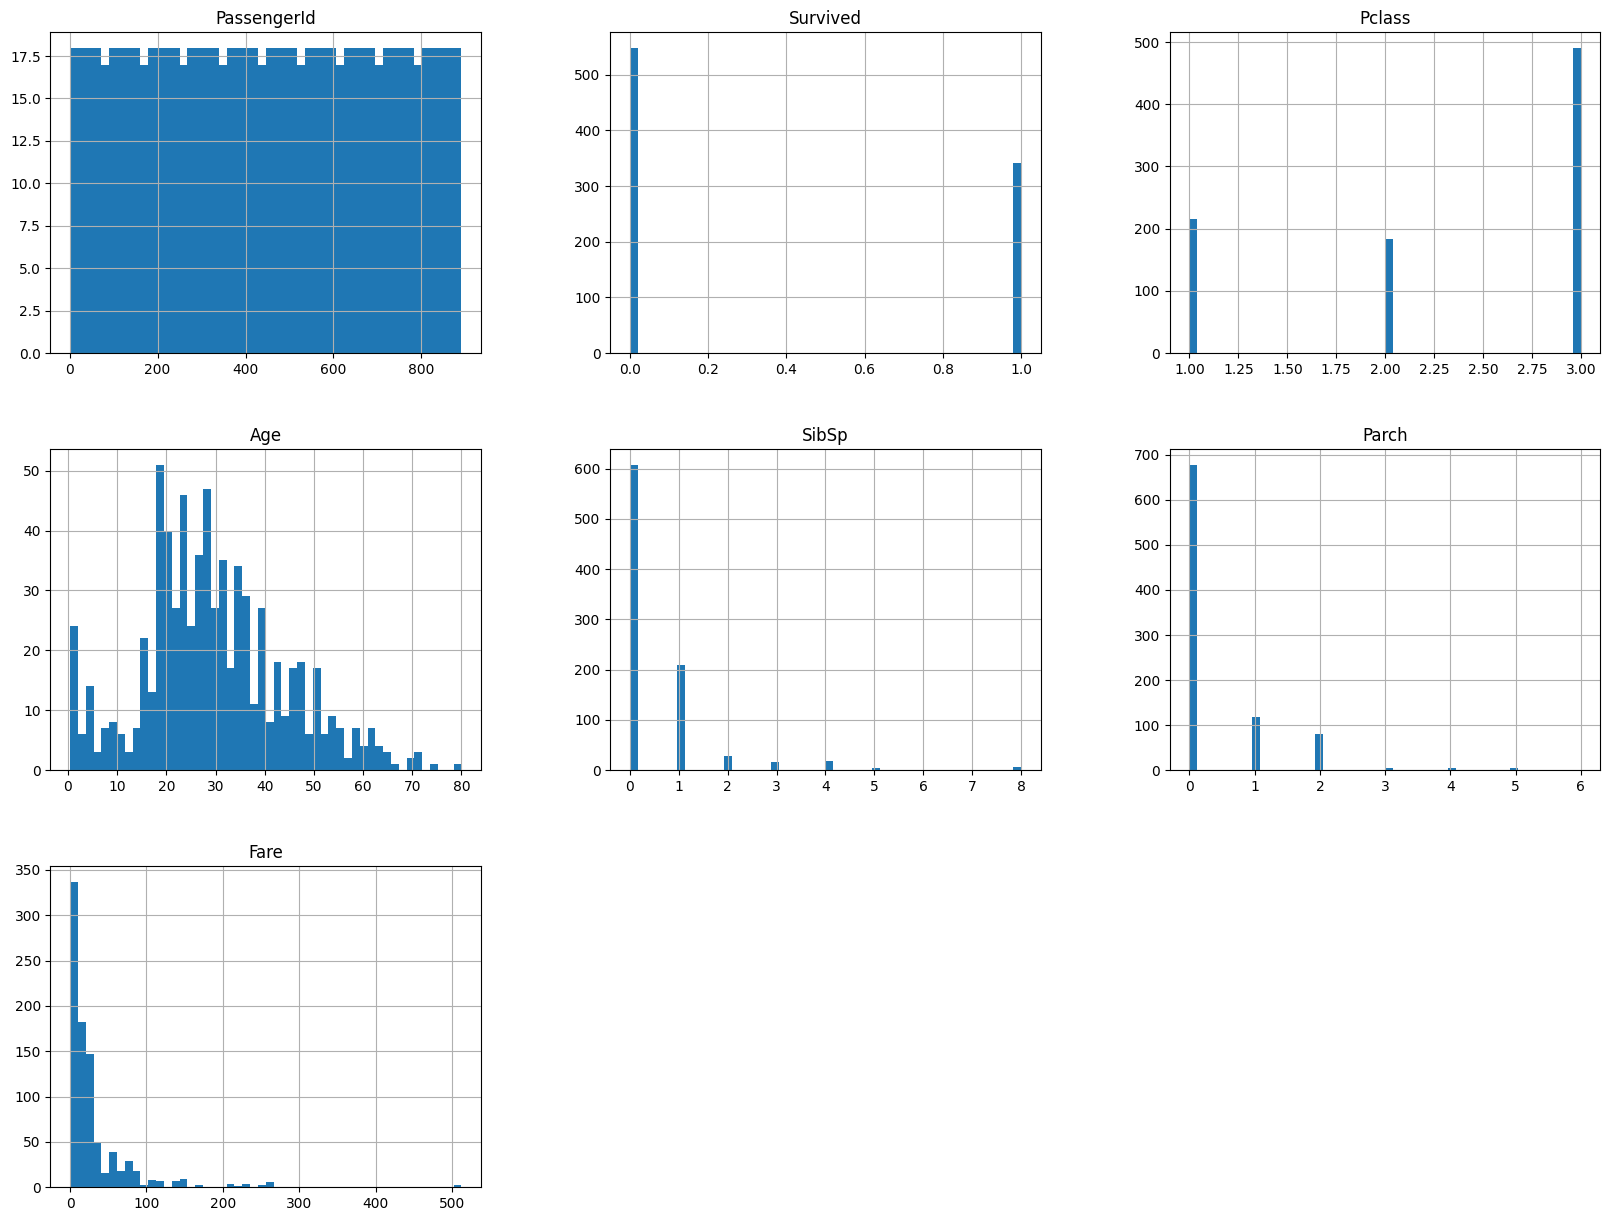

In [113]:
%matplotlib inline
import matplotlib.pyplot as plt
titanic_train.hist(bins=50, figsize=(20,15))
plt.show()

In [116]:
from sklearn.ensemble import RandomForestClassifier

In [117]:
y = titanic_train['Survived']

In [118]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [121]:
features = ['Pclass', 'Sex', 'SibSp', 'Parch']

In [ ]:
forest_clf = RandomForestClassifier(random_state=42, n_jobs=6, n_estimators=100, max_depth=5)



In [126]:
from sklearn.preprocessing import OneHotEncoder #convert catigories into an array of 0, 1 choices
from sklearn.compose import ColumnTransformer

In [131]:
pipeline = ColumnTransformer([
    ('cat', OneHotEncoder(sparse=False), features)
])
titanic_train_prepared = pipeline.fit_transform(titanic_train)

/usr/local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [134]:
titanic_train_prepared

array([[0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

# Linear Regression

In [135]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(titanic_train_prepared, y)

LinearRegression()

In [137]:
some_data = titanic_train.iloc[:5]
some_data_lb = y.iloc[:5]
some_data_prepared = pipeline.transform(some_data)
print(lin_reg.predict(some_data_prepared))

[0.12207031 0.91503906 0.61035156 0.91503906 0.10058594]


In [138]:
list(some_data_lb)

[0, 1, 1, 1, 0]

## Meaure Performance

In [139]:
from sklearn.metrics import mean_squared_error

In [140]:
titanic_predictions = lin_reg.predict(titanic_train_prepared)
lin_mse = mean_squared_error(y, titanic_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.3786380289030225

# Random Forest Regressor

In [141]:
from sklearn.ensemble import RandomForestRegressor

In [142]:
forest_regression = RandomForestRegressor(n_estimators=200, random_state=69, n_jobs=12)
forest_regression.fit(titanic_train_prepared, y)


RandomForestRegressor(n_estimators=200, n_jobs=12, random_state=69)

In [143]:
titanic_predict_forest = forest_regression.predict(titanic_train_prepared)
forest_mse = mean_squared_error(y, titanic_predict_forest)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.35452162653839375

# random Forest Classifier

In [144]:
from sklearn.ensemble import RandomForestClassifier

In [145]:
forest_class = RandomForestClassifier(random_state=69, n_estimators=200, n_jobs=12)
forest_class.fit(titanic_train_prepared, y)

RandomForestClassifier(n_estimators=200, n_jobs=12, random_state=69)

In [146]:
forest_class_predict = forest_class.predict(titanic_train_prepared)
forest_mse = mean_squared_error(y, forest_class_predict)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.4277154618129319

In [147]:
from sklearn.model_selection import cross_val_predict


In [148]:
y_probas_forest = cross_val_predict(forest_class, titanic_train_prepared, y, cv=3, method='predict_proba')

# Grid Search

In [149]:
from sklearn.model_selection import GridSearchCV

In [151]:
param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

In [152]:
grid_search = GridSearchCV(forest_class, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(titanic_train_prepared, y)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=200, n_jobs=12,
                                              random_state=69),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [153]:
grid_search.best_estimator_

RandomForestClassifier(max_features=2, n_estimators=10, n_jobs=12,
                       random_state=69)

In [154]:
grid_search.classes_

array([0, 1])

In [155]:
grid_search.best_score_

-0.20872512711066477

In [156]:
grid_search.best_params_

{'max_features': 2, 'n_estimators': 10}

In [157]:
negative_mse = grid_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

0.4568644515725258

# Titanic take 2

The attributes have the following meaning:

- PassengerId: a unique identifier for each passenger
- Survived: that's the target, 0 means the passenger did not survive, while 1 means he/she survived.
- Pclass: passenger class.
- Name, Sex, Age: self-explanatory
- SibSp: how many siblings & spouses of the passenger aboard the Titanic.
- Parch: how many children & parents of the passenger aboard the Titanic.
- Ticket: ticket id
- Fare: price paid (in pounds)
- Cabin: passenger's cabin number
- Embarked: where the passenger embarked the Titanic

In [158]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [159]:
results = titanic_train['Survived']

Pclass = Category
name = na
SibSp (Souces / siblings) - Category
Parch = (parents) - numbers
ticketid = na
fair - numbers
cabin - na
embarked

In [162]:
num_attrubtes = ['Age', 'Parch', 'Fare', 'SibSp']
cat_attrubtes = ['Pclass', 'Sex']

In [163]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),  #fills missing data
        ("scaler", StandardScaler())
    ])

In [164]:
from sklearn.preprocessing import OneHotEncoder
cat_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")), #fills missing data
        ("cat_encoder", OneHotEncoder(sparse=False)),
    ]) 

In [165]:
preprocess_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attrubtes),
        ("cat", cat_pipeline, cat_attrubtes),
    ])

In [166]:
X_train = preprocess_pipeline.fit_transform(titanic_train[num_attrubtes + cat_attrubtes])
X_train

/usr/local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[-0.56573646, -0.47367361, -0.50244517, ...,  1.        ,
         0.        ,  1.        ],
       [ 0.66386103, -0.47367361,  0.78684529, ...,  0.        ,
         1.        ,  0.        ],
       [-0.25833709, -0.47367361, -0.48885426, ...,  1.        ,
         1.        ,  0.        ],
       ...,
       [-0.1046374 ,  2.00893337, -0.17626324, ...,  1.        ,
         1.        ,  0.        ],
       [-0.25833709, -0.47367361, -0.04438104, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.20276197, -0.47367361, -0.49237783, ...,  1.        ,
         0.        ,  1.        ]])

In [167]:
y_train = results

In [168]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=100, random_state=69, n_jobs=12)


In [169]:
forest_clf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=12, random_state=69)

In [170]:
X_test = preprocess_pipeline.transform(titanic_test[num_attrubtes+cat_attrubtes])
y_pred = forest_clf.predict(X_test)

In [173]:
y_pred

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [174]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_clf, X_train, y_train, cv=10)
forest_scores.mean()

0.8171535580524344